In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
数据的真实分布
'''
def real_func(x):
    return np.sin(2 * np.pi * x)

给定$T=\{(x_1, y_1), (x_2, y_2), (x_n, y_n)\}$，其中$x_i \in \mathbb{R}^m$，$y \in \mathbb{R}$，最小二乘法为寻找函数$f(x)=\sum_{j=0}^{m-1} w_j * x_i$，使得$\sum_{i=1}^n \|f(x_i) - y_i\| ^ 2$最小

设矩阵
$X = \begin{bmatrix} 
x_1^0 & x_1^1 & \cdots & x_1^{m-1} \\
x_2^0 & x_2^1 & \cdots & x_2^{m-1} \\
\vdots & \vdots & \ddots & \vdots \\
x_n^0 & x_n^1 & \cdots & x_n^{m-1}
\end{bmatrix}$，
$W = \begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_{m-1}
\end{bmatrix}$，
$Y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_{m-1}
\end{bmatrix}$，则最小二乘法的目标可以表示为$\|XW - Y\|^2$最小

考虑$X$为$\mathbb{R}^n$中的一个子空间，$Y$为其中的一个向量，$XW$即为子空间$X$的一个向量，$e=XW-Y$为向量之间的误差，当$e$最小时，也就是$e \bot X$，所以$X^T(XW-Y)=0$，解得$W = (X^{T}X)^{-1}X^{T}Y$

所以$W$有解的条件就是$X^{T}X$有逆，即为$X$列满秩

In [3]:
class polynomial:
    '''
    一个多项式类f(x) = \sum_{i=0}^M {w_i * x^i}
    '''
    def __init__(self, M):
        '''
        M: 多项式的复杂度
        w: 多项式系数
        '''
        self.M = M
        self.w = np.zeros(self.M + 1)
    
    def predict(self, x):
        func = np.poly1d(self.w[::-1])
        return func(x)
    
    def fit(self, x, y):
        '''
        使用最小二乘法拟合多项式系数
        '''
        assert len(x) == len(y), 'length of x is not to length of y'
        n = len(x)
        X = np.zeros((n, self.M + 1))
        for i in range(n):
            for j in range(self.M + 1):
                X[i][j] = x[i] ** j
        X = np.matrix(X)
        Y = np.matrix(y).T
        self.w = ((X.T * X).I * X.T * Y).A1

In [4]:
X_train = np.linspace(0, 1, 10)
Y_train = [np.random.normal(0, 0.1) + real_func(num) for num in X_train]
X_test = np.linspace(0, 1, 1000)
Y_test = real_func(X_test)

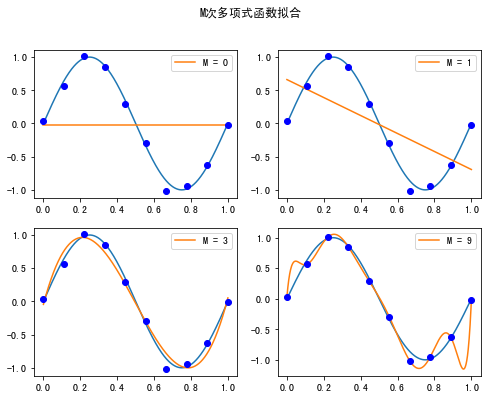

In [5]:
fig = plt.figure(figsize=(8, 6))
for i, M in enumerate([0, 1, 3, 9]):
    f = polynomial(M)
    f.fit(X_train, Y_train)
    Y_pred = f.predict(X_test)
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(X_test, Y_test)
    ax.plot(X_test, Y_pred, label='M = {}'.format(M))
    ax.plot(X_train, Y_train, 'bo')
    plt.legend(loc='best')
plt.suptitle('M次多项式函数拟合')
plt.show()